## 3.5 범주형 독립변수

In [27]:
import statsmodels.api as sm


범주형 값은 여러개의 다른 상태를 나타내는 값이다. 범주형 값을 'A', 'B', 'C'라는 문자로 표현하는 경우도 있고 '1', '2', '3'과 같이 숫자로 표현하는 경우도 있지만 이 경우는 'A'라는 글자대신 '1'이라는 글자를 이용한 것 뿐이지 숫자로서의 의미는 없다. 즉, '2'라는 값이 '1'이라는 값보다 2배 더 크다는 뜻이 아니다. 

회귀분석을 할 때는 숫자가 아닌 독립변수 값은 쓸 수 없기 때문에 어떤 방식으로든 범주형 독립변수의 값을 사용할 수 있는 방법을 찾아야 한다. 범주형 독립변수를 처리하는 가장 일반적인 방법은 더미변수(dummy variable)로 변환하는 것이다. 

### 더미변수

**더미변수(dummy variable)는 0 또는 1만으로 표현되는 값으로 어떤 특징이 존재하는가 존재하지 않는가를 표시하는 독립변수다.** 다음과 같은 명칭으로도 불린다.

* Boolean indicator
* binary variable
* indicator variable
* design variable
* treatment


patsy 패키지의 `dmatrix` 명령과 `OLS` 클래스의 `from_formula` 메서드는 포뮬러 문자열을 이용하여 범주형 변수의 값을 더미변수로 인코딩하는 기능을 제공한다.

In [5]:
from patsy import *_

In [6]:
from patsy import *

### 범주형 변수가 하나인 경우

$x_1, x_2, \ldots, x_D$라는 $D$개의 독립변수를 가지는 선형회귀모형을 생각하자.

$$ \hat{y} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_Dx_D $$

여기에서 $x_1$이라는 독립변수만 범주형 변수이고 'A'과 'B'라는 두 가지의 범주값을 가질 수 있다고 하자. 

가장 간단한 방법은 전체 데이터를 $x_1=A$인 데이터와 $x_2=B$인 데이터 두 그룹으로 나누어 각각의 데이터에 대한 선형회귀모형을 만드는 것이다. 즉 다음과 같은 2개의 선형회귀모형을 만든다.


$$ 
\text{model A}:\;\; \hat{y} = w_{A,0} \; + w_{A,2}x_2 + \cdots + w_{A,D}x_D \;\; (\text{if } x_1 = A) 
$$

$$ 
\text{model B}:\;\; \hat{y} = w_{B,0} \; + w_{B,2}x_2 + \cdots + w_{B,D}x_D \;\; (\text{if } x_1 = B) 
$$


그런데 올바른 선형회귀모형에서는 $x_1$이 아닌 다른 변수 예를 들어 $x_2$의 값이 변할 때 $y$값이 변화하는 정도, 즉 가중치 $w_2$는 $x_1$의 값이 A이든 B든 같아야 한다. 하지만 위와 같은 두 개의 선형회귀모형을 만들면 $w_2$의 값이 $w_{A,2}$와 $w_{B,2}$라는 두 가지의 다른 값이 나오므로 위 모형은 적당하지 않다.

더미변수 방법은 범주형 변수 $x_1$을 $d_{1A}, d_{1B}$라는 두 개의 더미변수로 바꾸는 것이다. 더미변수로 변환하면 상수항은 없어진다. 그 이유는 나중에 설명한다.

$$
\begin{aligned}
\hat{y} &= w_0 && + && \hspace{1cm} w_1 x_1          & +  w_2 x_2  + \cdots  + w_D x_D \\
        &      &&   && \hspace{1.2cm} \downarrow       &     \\
\hat{y} &=     &&   && w_{1A} d_{1A} + w_{1B} d_{1B} & +  w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}
$$

더미변수가 2개인 이유는 더미변수가 가질 수 있는 범주값이 2개이기 때문이다. 범주값이 $K$개이면 범주형 변수 $x_1$을 $d_{11}, \ldots, d_{1K}$라는 $K$개의 더미변수로 바꾸어야 한다.

더미변수의 값은 항상 0또는 1이어야하는데 더미변수의 값을 지정하는 방법에는 축소랭크(reduced-rank) 방식과 풀랭크(full-rank) 방식 두가지가 있다.

### 풀랭크 방식

**풀랭크(full-rank) 방식에서는 더미변수의 값을 원핫인코딩(one-hot-encoding) 방식으로 지정한다.** 즉 범주값이 2가지인 경우에는 

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 0 \\
x_1=B \;\;&\rightarrow\;\;  d_{1A}=0,\, d_{1B} = 1 \\
\end{aligned}
$$

이 된다. 이 값을 대입하면 더미변수의 가중치는 상수항이 된다.

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  \hat{y} = w_{1A} + w_2 x_2  + \cdots  + w_D x_D \\
x_1=B \;\;&\rightarrow\;\;  \hat{y} = w_{1B} + w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}
$$

다시 말해 범주값이 달라지면 상수항만 달라지고 다른 독립변수의 가중치(영향)는 같은 모형이 되는 것이다.


<img src="https://datascienceschool.net/upfiles/cc2b959c098f4e3ebf82743eca24b326.png" width="100%"/>

그림 3.5.1 : 풀랭크 방식 더미변수 가중치의 의미

선형회귀모형에 범주형 독립변수가 있으면 더미변수의 가중치 이외에 별도의 상수항이 있으면 안된다. 만약 위의 모형에서 별도의 상수항 $w_0$이 존재한다면 모형은 다음처럼 될 것이다.

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  \hat{y} = (w_0 + w_{1A}) + w_2 x_2  + \cdots  + w_D x_D \\
x_1=B \;\;&\rightarrow\;\;  \hat{y} = (w_0 + w_{1B}) + w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}
$$

이 경우에는 $w_0 + w_{1A}$나 $w_0 + w_{1B}$의 값은 구할 수 있어도  $w_0$ 값과 $w_{1A}$ 값을 분리할 수는 없다. **범주형 독립변수가 있으면 상수항은 포함시키지 않는다.**

patsy 패키지는 변수의 값이 문자이면 자동으로 범주형 독립변수로 인식한다. 풀랭크 모형을 사용하려면 포뮬러 문자열에 ``+0`` 또는 ``-1``을 붙여야 한다. 더미변수의 이름은 자동으로 ``원래변수의 이름 + [범주값]``으로 정해진다.

In [7]:
df1 = pd.DataFrame(["A", "A", "B", "B"], columns=["x1"])
df1

,x1
0,A
1,A
2,B
3,B


In [18]:
dmatrix("x1+0", df1)

DesignMatrix with shape (4, 2)
  x1[A]  x1[B]
      1      0
      1      0
      0      1
      0      1
  Terms:
    'x1' (columns 0:2)

In [13]:
dmatrix("x1+0",df1)

DesignMatrix with shape (4, 2)
  x1[A]  x1[B]
      1      0
      1      0
      0      1
      0      1
  Terms:
    'x1' (columns 0:2)

데이터가 범주형 값이지만 정수로 표시된 경우에는 `C()` 연산자를 이용하여 범주형 값임을 명시적으로 지정할 수 있다.

In [11]:
df2 = pd.DataFrame([1, 2, 3, 4], columns=["x1"])
df2

,x1
0,1
1,2
2,3
3,4


In [14]:
dmatrix("C(x1)-1",df2)

DesignMatrix with shape (4, 4)
  C(x1)[1]  C(x1)[2]  C(x1)[3]  C(x1)[4]
         1         0         0         0
         0         1         0         0
         0         0         1         0
         0         0         0         1
  Terms:
    'C(x1)' (columns 0:4)

In [12]:
dmatrix("C(x1) - 1", df2)

DesignMatrix with shape (4, 4)
  C(x1)[1]  C(x1)[2]  C(x1)[3]  C(x1)[4]
         1         0         0         0
         0         1         0         0
         0         0         1         0
         0         0         0         1
  Terms:
    'C(x1)' (columns 0:4)

### 축소랭크 방식

**축소랭크(reducec-rank) 방식에서는 특정한 하나의 범주값을 기준값(reference, baseline)으로 하고 기준값에 대응하는 더미변수의 가중치는 항상 1으로 놓는다.** 다른 범주형 값을 가지는 경우는 기준값에 추가적인 특성이 있는 것으로 간주한다. 예를 들어 다음 축소랭크 방식은 $x_1=A$를 기준값으로 하는 경우이다.

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 0 \\
x_1=B \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 1 \\
\end{aligned}
$$

반대로 $x_1=B$를 기준값으로 하면 다음과 같아진다.

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 1 \\
x_1=B \;\;&\rightarrow\;\;  d_{1A}=0,\, d_{1B} = 1 \\
\end{aligned}
$$

이 값을 대입하면 기준값인 더미변수의 가중치는 상수항이 되고 나머지 더미변수의 가중치는 그 상수항에 추가적으로 더해지는 상수항이 된다. $x_1=A$를 기준값으로 하는 경우에는 다음과 같다.

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  \hat{y} = w_{1A}          &+ w_2 x_2  + \cdots  + w_D x_D \\
x_1=B \;\;&\rightarrow\;\;  \hat{y} = w_{1A} + w_{1B} &+ w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}
$$


<img src="https://datascienceschool.net/upfiles/5cdba8a462f44c1c9f91446b6af3122b.png" width="100%"/>

그림 3.5.2 : 축소랭크 방식 더미변수 가중치의 의미

patsy에서 포뮬러 문자열에 ``+0`` 또는 ``-1``이 없으면 축소랭크 방식으로 간주한다. 별도로 지정하지 않으면 알파벳 순서로 가장 빠른 범주값이 기준값이 된다. 축소랭크 방식에서는 범주값 이름 앞에 Treatment를 뜻하는 `T.` 기호가 붙는다.

In [20]:
df3 = pd.DataFrame(["A", "B", "C"], columns=["x1"])
df3

,x1
0,A
1,B
2,C


In [ ]:
df3=pd.DataFrame(`)

In [21]:
dmatrix("x1",df3)

DesignMatrix with shape (3, 3)
  Intercept  x1[T.B]  x1[T.C]
          1        0        0
          1        1        0
          1        0        1
  Terms:
    'Intercept' (column 0)
    'x1' (columns 1:3)

In [7]:
dmatrix("x1", df3)

DesignMatrix with shape (3, 3)
  Intercept  x1[T.B]  x1[T.C]
          1        0        0
          1        1        0
          1        0        1
  Terms:
    'Intercept' (column 0)
    'x1' (columns 1:3)

만약 기준값을 다른 값으로 바꾸고 싶으면 `Treatment` 연산자를 사용한다. 다음 코드에서는 B를 기준값으로 사용하였다.

In [25]:
dmatrix("C(x1, Treatment('B'))",df3)

DesignMatrix with shape (3, 3)
  Intercept  C(x1, Treatment('B'))[T.A]  C(x1, Treatment('B'))[T.C]
          1                           1                           0
          1                           0                           0
          1                           0                           1
  Terms:
    'Intercept' (column 0)
    "C(x1, Treatment('B'))" (columns 1:3)

In [8]:
dmatrix("C(x1, Treatment('B'))", df3)

DesignMatrix with shape (3, 3)
  Intercept  C(x1, Treatment('B'))[T.A]  C(x1, Treatment('B'))[T.C]
          1                           1                           0
          1                           0                           0
          1                           0                           1
  Terms:
    'Intercept' (column 0)
    "C(x1, Treatment('B'))" (columns 1:3)

### 하나의 범주형 독립변수가 있는 회귀분석

#### 예제

월(month)을 독립변수로 하여 해당 월의 기온을 예측하는 회귀분석을 해보자. 데이터는 다음과 같다.

In [9]:
df_nottem = sm.datasets.get_rdataset("nottem").data

In [52]:
df_nottem = sm.datasets.get_rdataset("nottem").data

일단 다음 코드를 사용하여 연단위(year fraction) 데이터에서 월을 추출해낸다.

In [53]:
import datetime
from calendar import isleap

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))#year는 1970년 기준
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date


df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]
df_nottem.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


이 데이터를 박스플롯으로 시각화한다.

NameError: name 'plt' is not defined

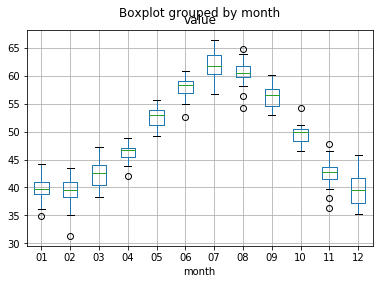

In [54]:
df_nottem.boxplot("value", "month")
plt.show()

풀랭크 방식으로 더미변수를 만들어 회귀분석을 하면 각 월의 평균 기온을 구할 수 있다. 월 데이터가 숫자이므로 연속값으로 인식하지 않도록 `C()` 연산자를 사용하였다.

In [55]:
df_nottem

,time,value,month
0,1920.000000,40.6,01
1,1920.083333,40.8,02
2,1920.166667,44.4,03
3,1920.250000,46.7,04
4,1920.333333,54.1,05
...,...,...,...
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11


In [56]:
model = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Mon, 18 May 2020   Prob (F-statistic):          2.96e-125
Time:                        16:38:44   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

포뮬러 문자열에서 `+0`을 제외하면 축소랭크 방식을 사용한다. 이 때는 1월의 평균 기온을 기준으로 각 월의 평균 기온이 얼마나 더 높은지를 나타내는 값이 회귀모형의 계수가 된다.

In [57]:
model = sm.OLS.from_formula("value ~ C(month)", df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Mon, 18 May 2020   Prob (F-statistic):          2.96e-125
Time:                        16:38:46   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6950      0.518     76.

### 보스턴 집값 데이터의 범주형 변수

보스턴 집값 데이터는 `CHAS`라는 범주형 변수를 가지고 있다. 이 변수는 0과 1 두 개의 값(클래스)를 가지므로 이미 full rank 더미변수로 변환되어 있는 것과 비슷하다. 즉 다음과 같은 두 개의 모형을 각각 회귀분석하는 경우라고 볼 수 있다. 

* `CHAS` = 1 인 경우,
$$ y = (w_0 + w_{\text{CHAS}}) + w_{\text{CRIM}} \text{CRIM} + w_{\text{ZN}} \text{ZN} + \cdots $$

* `CHAS` = 0 인 경우,
$$ y = w_0 + w_{\text{CRIM}} \text{CRIM} + w_{\text{ZN}} \text{ZN} + \cdots $$


In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX_boston = sm.add_constant(dfX0_boston)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

model = sm.OLS(dfy_boston, dfX_boston)
result = model.fit()
print(result.summary())

NameError: name 'sm' is not defined

In [14]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX_boston = sm.add_constant(dfX0_boston)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

model = sm.OLS(dfy_boston, dfX_boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 17 Jun 2019   Prob (F-statistic):          6.72e-135
Time:                        12:38:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

위 분석에서 두 데이터 그룹은 찰스강에 인접하지 않은 집의 가격 모형은 상수항이 $36.4911$이지만 찰스강에 인접한 집의 가격 모형은 상수항이 $36.4911 + 2.6886 = 39.1797$이라는 것을 알 수 있다.

#### 연습 문제 2.4.1

1. `from_formula` 메서드를 사용하여 보스턴 집값 예측 문제를 다시 풀어라. `C()`를 사용하여 범주형값임을 명시적으로 지정하는 것을 잊으면 안된다.
2. 모형 문자열에서 상수항을 없애지 말고 다시 푼다. 이때 `CHAS` 변수의 가중치는 무엇을 뜻하는가.

In [73]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX_boston = sm.add_constant(dfX0_boston)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

model = sm.OLS.from_formula("MEDV ~ C(CHAS)+0",df_boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Mon, 18 May 2020   Prob (F-statistic):           7.39e-05
Time:                        16:51:58   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(CHAS)[0.0]    22.0938      0.418     52.902   

In [70]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX_boston = sm.add_constant(dfX0_boston)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

model = sm.OLS.from_formula("MEDV ~ C(CHAS)",df_boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Mon, 18 May 2020   Prob (F-statistic):           7.39e-05
Time:                        16:51:10   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.0938      0.418     52.

### `ContrastMatrix`

사용자가 원하는 특정한 더미변수 값을 지정하고 싶다면 `ContrastMatrix` 클래스를 사용한다. `ContrastMatrix` 행렬은 각 클래스가 인코딩될 벡터값 목록을 미리 정의한 행렬이다.

In [15]:
df4 = pd.DataFrame(["A", "B", "C", "A", "B"], columns=["x1"])
df4

,x1
0,A
1,B
2,C
3,A
4,B


예를 들어 위 데이터에서 B와 C 카테고리를 하나의 카테고리로 묶어서 인코딩하고 싶다면 다음처럼 코딩한다.

In [16]:
encoding_vectors = [[1, 0], [0, 1], [0, 1]]
label_postfix = [":A", ":BC"]
contrast = ContrastMatrix(encoding_vectors, label_postfix)
dmatrix("C(x1, contrast) + 0", df4)

DesignMatrix with shape (5, 2)
  C(x1, contrast):A  C(x1, contrast):BC
                  1                   0
                  0                   1
                  0                   1
                  1                   0
                  0                   1
  Terms:
    'C(x1, contrast)' (columns 0:2)

### 두 개 이상의 범주형 변수가 있는 경우

두 개 이상의 범주형 변수가 있는 경우에는 축소형 방식을 사용한다. 이 때 주의할 점은 모든 범주형 범수의 가중치는 기준값 상수항에 더해지는 상수항으로 취급된다. 예들 들어  $x_1$은 A, B 의 두가지 값을 가지고 $x_2$은 X, Y의 두가지 값을 가지고 값을 가지는 경우 상수항과 각 더미변수의 가중치의 의미는 다음과 같아진다.

$$
\begin{aligned}
\hat{y} &= w_0    && + && w_1 x_1                 && + && w_2 x_2                 &+ \cdots  + w_D x_D \\
        &         &&   && \hspace{5pt} \downarrow &&   && \hspace{5pt} \downarrow & \\
\hat{y} &= w_{AX} && + && w_{1B} d_{1B}           && + && w_{2Y} d_{2Y}           &+ \cdots  + w_D x_D \\
\end{aligned}
$$



* $w_{AX} $: 기준값 $x_1=A, x_2=X$인 경우의 상수항
* $w_{1,B}$: 기준값 $x_1=B, x_2=X$인 경우에 추가되는 상수항
* $w_{1,Y}$: 기준값 $x_1=A, x_2=Y$인 경우에 추가되는 상수항
* $w_{1,B} + w_{1,Y}$: 기준값 $x_1=B, x_2=Y$인 경우에 추가되는 상수항


In [17]:
df5 = pd.DataFrame([["A", "X"], ["B", "X"], ["A", "Y"], ["B", "Y"]], columns=["x1", "x2"])
df5

,x1,x2
0,A,X
1,B,X
2,A,Y
3,B,Y


In [18]:
dmatrix("x1 + x2", df5)

DesignMatrix with shape (4, 3)
  Intercept  x1[T.B]  x2[T.Y]
          1        0        0
          1        1        0
          1        0        1
          1        1        1
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)

<img src="https://datascienceschool.net/upfiles/69c177d3e0434a8b8c0790c657f10993.png" width="100%"/>

그림 2.5.3 : 두 개의 범주형 독립변수가 있는 경우

### 범주형 독립변수와 실수 독립변수의 상호작용

만약 범주형 변수의 값이 달라질 때 상수항만 달라지는 것이 아니라 다른 독립변수들이 미치는 영향도 달라지는 모형을 원한다면 상호작용(interaction)을 쓰면 된다. 예를 들어 범주형 독립변수 $x_1$과 실수 독립변수 $x_2$를 가지는 회귀모형에서 연속값 독립변수 $x_2$가 미치는 영향 즉 가중치가 범주형 독립변수 $x_1$의 값에 따라 달라진다면 범주형 독립변수를 더미변수 $d_1$으로 인코딩하고 연속값 독립변수 $x_2$는 $d_1$과의 상호작용 항 `d_1:x_2` 를 추가하여 사용한다.


이 때 모형은 다음과 같아진다.

$$ 
\begin{aligned}
\hat{y} 
&= w_0 + w_{1} x_1 \cdot w_2 x_2 \\
&= w_0 + (w_{1A}d_A + w_{1B}d_B) \cdot (w_2x_2) \\
&= w_0 + w_{2A} d_A x_2 + w_{2B} d_B  x_2 \\
\end{aligned}
$$

$x_1=A$일 때는 $d_A=1,d_B=0$에서

$$ \hat{y} = w_0 + w_{2A}x_2 $$

$x_1=B$일 때는  $d_A=0,d_B=1$에서

$$ \hat{y} = w_0 + w_{2B}x_2 $$

이므로 $x_1$ 범주값에 따라 $x_2$의 기울기가 달라지는 모형이 된다.

In [19]:
df6 = pd.DataFrame([["A", 1], ["B", 2], ["A", 4], ["B", 5]], columns=["x1", "x2"])
df6

,x1,x2
0,A,1
1,B,2
2,A,4
3,B,5


In [20]:
dmatrix("C(x1):x2", df6)

DesignMatrix with shape (4, 3)
  Intercept  C(x1)[A]:x2  C(x1)[B]:x2
          1            1            0
          1            0            2
          1            4            0
          1            0            5
  Terms:
    'Intercept' (column 0)
    'C(x1):x2' (columns 1:3)

<img src="https://datascienceschool.net/upfiles/2ff6692d3de949db9a37f0765b6baaab.png" width="100%"/>

그림 2.5.4 : 범주형 독립변수와 실수 독립변수의 상호작용이 있는 경우

만약 범주형 독립변수도 종속변수에 영향을 미치고 범주형 독립변수와 실수 독립변수의 상호작용도 종속변수에 영향을 미친다면 모형은 다음과 같아진다.

$$ 
\begin{aligned}
\hat{y} 
&= w_{1} x_1 + w_{12} x_1 \cdot w_2 x_2 \\
&= (w_{1A}d_A + w_{1B}d_B) + (w_{1A}d_A + w_{1B}d_B)\cdot (w_2x_2) \\
&= (w_{1A}d_A + w_{1B}d_B) + (w_{2A}d_A + w_{2B}d_B)x_2 \\
&= (w_{1A} + w_{2A} x_2)d_A + (w_{2B} + w_{2B}x_2)d_B \\
\end{aligned}
$$

$x_1=A$일 때는 $d_A=1,d_B=0$에서

$$ \hat{y} =w_{1A} + w_{2A}x_2 $$

$x_1=B$일 때는  $d_A=0,d_B=1$에서

$$ \hat{y} = w_{1B} + w_{2B}x_2 $$

이므로 $x_1$ 범주값에 따라 상수항과 $x_2$의 기울기가 모두 달라지는 모형이 된다.

In [21]:
dmatrix("C(x1) + C(x1):x2", df6)

DesignMatrix with shape (4, 4)
  Intercept  C(x1)[T.B]  C(x1)[A]:x2  C(x1)[B]:x2
          1           0            1            0
          1           1            0            2
          1           0            4            0
          1           1            0            5
  Terms:
    'Intercept' (column 0)
    'C(x1)' (column 1)
    'C(x1):x2' (columns 2:4)

<img src="https://datascienceschool.net/upfiles/f093b73d4e964688aab5d86cd54e932f.png" width="100%"/>

그림 3.5.5 : 범주형 독립변수, 범주형 독립변수와 실수 독립변수의 상호작용 모두 있는 경우

또는

In [22]:
dmatrix("C(x1)*x2", df6)

DesignMatrix with shape (4, 4)
  Intercept  C(x1)[T.B]  x2  C(x1)[T.B]:x2
          1           0   1              0
          1           1   2              2
          1           0   4              0
          1           1   5              5
  Terms:
    'Intercept' (column 0)
    'C(x1)' (column 1)
    'x2' (column 2)
    'C(x1):x2' (column 3)

### 범주형 독립변수의 상호작용

두 개의 범주형 독립변수가 있고 서로 상호작용이 존재한다면 다음과 같은 모형이 된다. 

$$ 
\begin{aligned}
\hat{y} 
&= w_1 x_1 \cdot w_2 x_2 \\
&= (w_{1A}d_A + w_{1B}d_B) \cdot (w_{2X}d_X + w_{2Y}d_Y) \\
&= w_{AX}d_Ad_Y + w_{BX}d_Bd_X + w_{AY}d_Ad_Y + w_{BY}d_Bd_Y \\
\end{aligned}
$$

즉 범주형 독립변수는 하나가 되고 대신 범주형 값이 두 독립변수의 범주형 값들의 조합인 $AX, BX, AY, BY$의 네가지가 된다.

In [23]:
dmatrix("x1:x2 + 0", df5)

DesignMatrix with shape (4, 4)
  x1[A]:x2[X]  x1[B]:x2[X]  x1[A]:x2[Y]  x1[B]:x2[Y]
            1            0            0            0
            0            1            0            0
            0            0            1            0
            0            0            0            1
  Terms:
    'x1:x2' (columns 0:4)

위 모형은 풀랭크 모형이고 축소랭크의 경우는 다음과 같다.

In [24]:
dmatrix("x1:x2", df5)

DesignMatrix with shape (4, 4)
  Intercept  x2[T.Y]  x1[T.B]:x2[X]  x1[T.B]:x2[Y]
          1        0              0              0
          1        0              1              0
          1        1              0              0
          1        1              0              1
  Terms:
    'Intercept' (column 0)
    'x1:x2' (columns 1:4)